In [2]:
import math
import matplotlib.pyplot as plt

In [3]:
file = open("IR-assignment-2-data.txt","r")

data = file.readlines()

data_list = []
for line in data:
    data_list.append(line.split())






## a)
### to extract qid:4 query url pairs from data and sort according to relevance scores

In [4]:
def fac(n):
    fact = 1
    for i in range(1, n+1):
        fact = fact * i
    return fact

qid4_list = []
for line_list in data_list:
    if line_list[1]=='qid:4':
        qid4_list.append(line_list)


qid4_sorted_list = []
count = 0
tot_count = 1
for j in range(4,-1,-1):
    count = 0
    for i in qid4_list:
        # print(j)
        if int(i[0]) == j:
            qid4_sorted_list.append(i)
            count+=1
    tot_count = tot_count*fac(count)

print("total number of files that can be made are:")
print(tot_count)

with open("qid4_sorted_data.txt", "wt") as f:
    for line in qid4_sorted_list:
        f.write(" ".join(line) + "\n")
    # for line in data_list:
    #     if line[1]!= 'qid:4':
    #         f.write(" ".join(line) + "\n")


total number of files that can be made are:
19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


## b)
### to calculate ndcg of first 50 results and the whole database

In [6]:

dcg50 = float(qid4_list[0][0])
for i in range(1,50):
    dcg50 += float(qid4_list[i][0])/(math.log(i+1,2))
    # print(dcg_all)

dcg50_ideal = float(qid4_sorted_list[0][0])
for i in range(1,50):
    dcg50_ideal += float(qid4_sorted_list[i][0])/math.log(i+1,2)
    
    # print(str(qid4_sorted_list[i][0]) + " " + str(math.log(i+1,2)) + " " + str(dcg50_ideal))

ndcg_50 = dcg50/dcg50_ideal

# for whole dataset 

dcg_all = float(qid4_list[0][0])
for i in range(1,len(qid4_sorted_list)):
    dcg_all += float(qid4_list[i][0])/(math.log(i+1,2))
    # print(dcg_all)

dcg_all_ideal = float(qid4_sorted_list[0][0])
for i in range(1,len(qid4_sorted_list)):
    dcg_all_ideal += float(qid4_sorted_list[i][0])/(math.log(i+1,2))
    # print(dcg_all_ideal)

ndcg_all = dcg_all/dcg_all_ideal

print("ndcg for first 50 is:")
print(ndcg_50)

print("ndcg for all dataset is:")
print(ndcg_all)

ndcg for first 50 is:
0.3521042740324887
ndcg for all dataset is:
0.5979226516897831


## c)
### precision -> True +ve/ ( true +ve + false +ve) or relevant results/ (relevant + non-relevant = total results) 
### recall -> True +ve/(true+ve + false -ve) or relevant results / total relevant results)

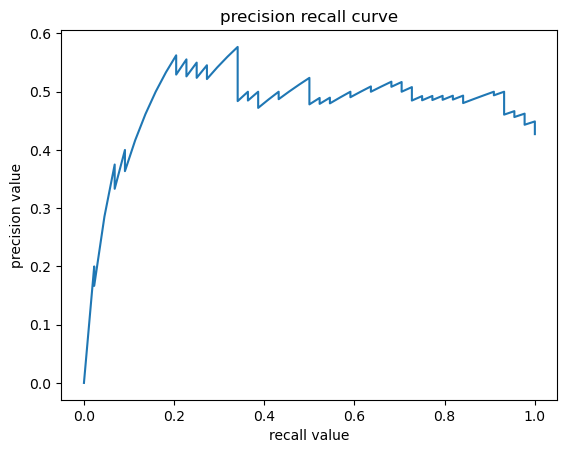

In [9]:
# creating list which is sorted on basis of feature 75 (sum of tf-idf of a doc) in descending order

qid4_f75_sorted = sorted(qid4_list, key = lambda x: float(x[76].split(':')[-1]), reverse = True)

# plotting the precision recall curve

cur_relevant_res = 0
recall = []
precision = []
tot_relevant = 0


for i in qid4_f75_sorted:
    if int(i[0]) > 0:
        tot_relevant += 1

for ind,i in enumerate(qid4_f75_sorted):
    if int(i[0]) > 0:
        cur_relevant_res += 1
    recall.append(float(cur_relevant_res/tot_relevant))
    precision.append(float(cur_relevant_res/(ind+1)))



plt.title("precision recall curve")
plt.ylabel("precision value")
plt.xlabel("recall value")
plt.plot(recall, precision)
plt.show()


# for i in range(len(qid4_f75_sorted)):
#     print(qid4_f75_sorted[i][76] + " " + qid4_list[i][76])

In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.